In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
n = 150

features= {'sepal_length':0,
    'sepal_width':1,
    'petal_length':2,
    'petal_width': 3,
    'variety':4
}

#Load dataset
df = pd.read_csv('./iris.data', header=None)
df


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [70]:
#petal length and petal width
X = df.iloc[:, [features['petal_length'], features['petal_width']]].values 

# 1 for Iris setosa, 0 for others
y = (df.iloc[:,features['variety']].values == 'Iris-setosa').astype(int)

In [71]:
def fixed_increment_procedure(X, y, c, w_init):
    w = np.copy(w_init)
    num_updates = 0
    while True:
        no_change = True
        for i in range(len(X)):
            x_i = np.append(X[i], 1) #add bias term
            y_hat_i = int(np.dot(w,x_i)>0) # predict label using current weights
            if y_hat_i != y[i]: #incorrent prediction
                w += c * (y[i] - y_hat_i) * x_i #update weights
                num_updates+=1
                no_change = False
        if no_change:
            break
    return w, num_updates

def fractional_correction_procedure(X, y, lam, w_init):
    w = np.copy(w_init)
    num_updates = 0
    while True:
        no_change = True
        for i in range(len(X)):
            x_i = np.append(X[i], 1) # add bias term
            y_hat_i = int(np.dot(w, x_i)>0) # predict label using current weights
            if y_hat_i != y[i]: #incorrect prediction
                w += lam * (y[i] - y_hat_i) * x_i / np.dot(x_i, x_i) #update weights
                num_updates += 1
                no_change = False
        if no_change:
            break
    return w, num_updates

In [72]:
w=np.array([0.1, 0.1, 0.1])
# Train TLU with fixed-increment procedure
w_fixed, num_updates_fixed = fixed_increment_procedure(X, y, c=0.1, w_init=w)

#Train TLU with fractional-correction procedure
w_frac, num_updates_frac = fractional_correction_procedure(X,y, lam=2, w_init=w)

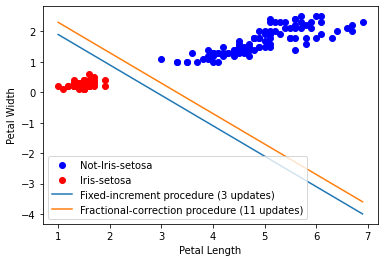

In [73]:
fig, ax = plt.subplots()

ax.scatter(X[y==0][:,0], X[y==0][:, 1], color='blue', label = 'Not-Iris-setosa')
ax.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label='Iris-setosa')

x_axis = np.linspace(X[:,0].min(), X[:,0].max(), 100)
y_axis_fixed = -(w[0] + w[1] * x_axis-0.39)/w[2]
y_axis_frac = -(w[0] + w[1] * x_axis-0.43)/w[2]

ax.plot(x_axis, y_axis_fixed, label = f'Fixed-increment procedure ({num_updates_fixed} updates)')
ax.plot(x_axis, y_axis_frac, label=f'Fractional-correction procedure ({num_updates_frac} updates)')

ax.legend()
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
plt.show()